In [4]:
# Basic utilities
import os
import csv
import pandas as pd
import numpy as np


# Transformers
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, TransformerMixin


# Models
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

#methods
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

#tools
from sklearn.utils.multiclass import type_of_target
from sklearn.base import BaseEstimator
from sklearn.exceptions import NotFittedError
from sklearn.base import clone
from sklearn.utils.multiclass import unique_labels, type_of_target
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import indexable
from sklearn.utils import _safe_indexing as safe_indexing 
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics._classification import _check_targets
from sklearn.metrics._classification import _check_targets
from sklearn.utils import check_X_y
from sklearn.base import is_regressor as sk_is_regressor
from sklearn.base import is_classifier as sk_is_classifier
from sklearn.base import is_outlier_detector as sk_is_outlier_detector
from yellowbrick.classifier import confusion_matrix



In [5]:
df = pd.read_csv('FEVS5yearT2.csv',sep=',',  low_memory=False)
df.head()

,Unnamed: 0.1,Unnamed: 0,agency_id,Q103,Q104,Q106,Q107,Q113,Q118,Q119,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
0,0,0,TR,2.0,4.0,4.0,4.000000,2.0,5.0,5.0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,AF,3.0,3.0,4.0,2.000000,2.0,2.0,2.0,...,1,0,0,0,0,1,0,0,0,0
2,2,2,TR,5.0,5.0,5.0,3.523792,4.0,5.0,4.0,...,1,0,0,0,0,1,0,0,0,0
3,3,3,TR,4.0,4.0,4.0,4.000000,3.0,4.0,3.0,...,1,0,0,0,0,1,0,0,0,0
4,4,4,HE,5.0,5.0,4.0,5.000000,4.0,5.0,4.0,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.shape

(2732092, 27)

In [7]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', nan, 'Leave'], dtype=object)

In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Q103,Q104,Q106,Q107,Q113,Q118,Q119,Q126,...,Q226_A,Q226_B,Q227_A,Q227_B,Q227_C,Q228_A,Q228_B,Q235_A,Q235_B,Q235_C
count,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,...,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06,2.732092e+06
mean,1.366046e+06,2.798736e+05,3.626316e+00,3.892961e+00,3.403266e+00,3.523792e+00,3.101778e+00,3.779857e+00,3.177464e+00,4.090176e+00,...,7.140766e-01,1.831589e-01,3.035084e-01,2.452930e-01,2.030869e-01,4.740832e-01,3.971360e-01,1.510879e-01,1.842094e-01,1.950304e-01
std,7.886872e+05,1.680542e+05,1.187627e+00,1.071978e+00,1.175664e+00,1.177966e+00,1.148435e+00,1.078224e+00,1.203159e+00,1.074396e+00,...,4.518532e-01,3.867968e-01,4.597729e-01,4.302609e-01,4.022967e-01,4.993280e-01,4.893047e-01,3.581346e-01,3.876549e-01,3.962242e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.830228e+05,1.366040e+05,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.366046e+06,2.732090e+05,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.049068e+06,4.103192e+05,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00,5.000000e+00,...,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.732091e+06,6.247990e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'agency_id', 'Q103', 'Q104', 'Q106',
       'Q107', 'Q113', 'Q118', 'Q119', 'Q126', 'Q133', 'Q136', 'Q137', 'Q138',
       'Q139', 'StayorGo', 'Q226_A', 'Q226_B', 'Q227_A', 'Q227_B', 'Q227_C',
       'Q228_A', 'Q228_B', 'Q235_A', 'Q235_B', 'Q235_C'],
      dtype='object')

In [10]:
#Joy, I added dropna=False so we could count NaN values in the total
print(df['StayorGo'].value_counts(dropna=False))
print(df['StayorGo'].value_counts()["Stay"])

Stay        1736122
Transfer     442466
Retire       278698
NaN          176148
Leave         98658
Name: StayorGo, dtype: int64
1736122


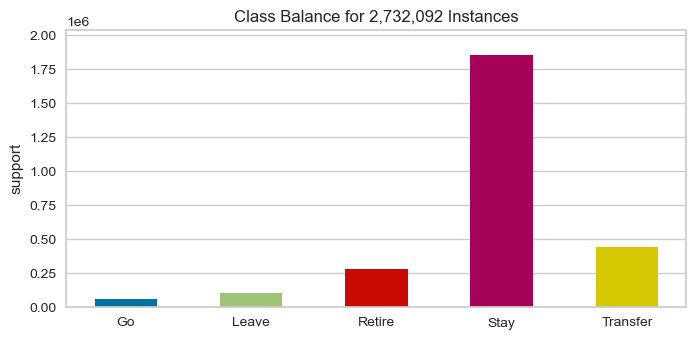

<AxesSubplot:title={'center':'Class Balance for 2,732,092 Instances'}, ylabel='support'>

In [19]:
y=df["StayorGo"]
from yellowbrick.target import ClassBalance
# Instantiate the visualizer
visualizer = ClassBalance(size=(800, 360)
)

visualizer.fit(y)
visualizer.show()

<AxesSubplot:>

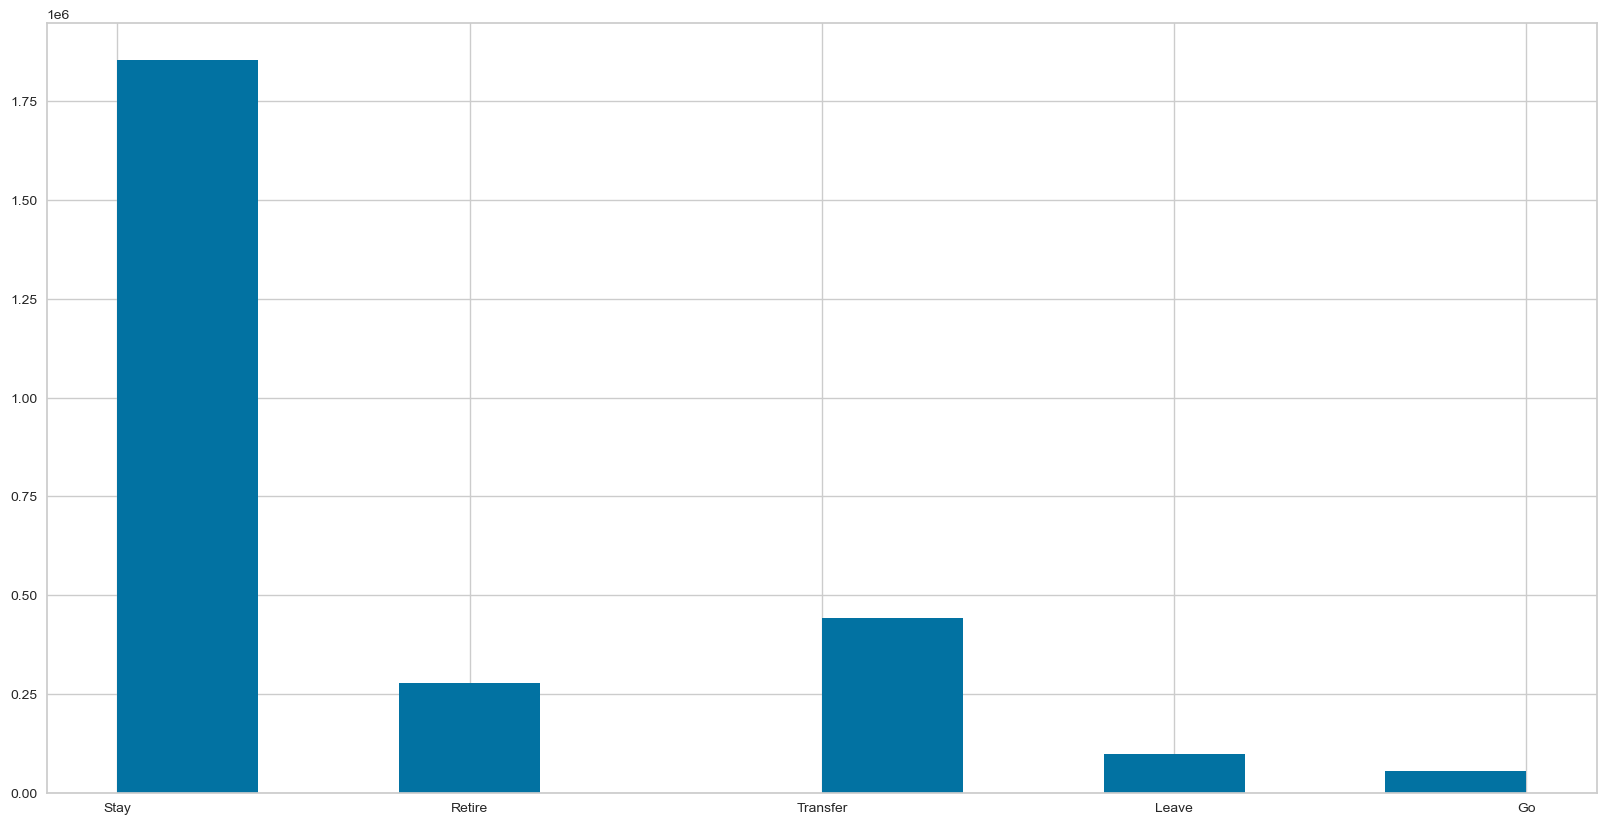

In [20]:
y.hist(figsize=(20,10))


In [11]:
frac=1736122/(1736122+442466+278698+98658)
print(frac)

0.6792488411326696


In [12]:
#to fill na in the "stayorgo" col fractionally 
mask = df['StayorGo'].isna() 
ind = df['StayorGo'].loc[mask].sample(frac=frac).index
df.loc[ind, 'StayorGo'] = "Stay"
df['StayorGo'] = df['StayorGo'].fillna("Go")
print(df)

         Unnamed: 0.1  Unnamed: 0 agency_id  Q103  Q104  Q106      Q107  Q113  \
0                   0           0        TR   2.0   4.0   4.0  4.000000   2.0   
1                   1           1        AF   3.0   3.0   4.0  2.000000   2.0   
2                   2           2        TR   5.0   5.0   5.0  3.523792   4.0   
3                   3           3        TR   4.0   4.0   4.0  4.000000   3.0   
4                   4           4        HE   5.0   5.0   4.0  5.000000   4.0   
...               ...         ...       ...   ...   ...   ...       ...   ...   
2732087       2732087      624795        HS   5.0   4.0   2.0  4.000000   2.0   
2732088       2732088      624796        HS   5.0   4.0   5.0  5.000000   4.0   
2732089       2732089      624797        HS   2.0   3.0   3.0  4.000000   4.0   
2732090       2732090      624798        HS   3.0   4.0   4.0  3.000000   3.0   
2732091       2732091      624799        HS   5.0   5.0   5.0  5.000000   2.0   

         Q118  Q119  ...  Q

In [13]:
df.StayorGo.unique()

array(['Stay', 'Retire', 'Transfer', 'Go', 'Leave'], dtype=object)

In [14]:
df['StayorGo'].value_counts(dropna=False)

Stay        1855770
Transfer     442466
Retire       278698
Leave         98658
Go            56500
Name: StayorGo, dtype: int64

In [15]:
df=df.replace(to_replace='Retire', value='Go')
df=df.replace(to_replace='Transfer', value='Go')
df=df.replace(to_replace='Leave', value='Go')

In [16]:
df['StayorGo'].value_counts(dropna=False)

Stay    1855770
Go       876322
Name: StayorGo, dtype: int64

In [17]:
df.shape

(2732092, 27)

In [18]:
frac2=1848056/(1848056+884036)
print(frac2)

0.6764252448307012


In [19]:
dfstay=df.loc[df['StayorGo'] == 'Stay']
dfstay.StayorGo.unique()

array(['Stay'], dtype=object)

In [22]:
#define X and y
#[other columns already dropped]
X = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'agency_id'], errors='raise')
y = df['StayorGo']

In [23]:
X.shape

(2732092, 24)

In [24]:
X.rename(columns={"Q137":"SatisfJob", "Q107":"TalentsUsed","Q107":"TalentsUsed","Q118":"RecommendOrg","Q139":"SatisfOrg",
"Q138":"SatisfPay","Q119":"SurveyBetter","Q133":"SrLSupportWL","Q113":"PerfDiffRecog","Q126":"GoodJobBySup","Q235_B":"EducBach",
"Q136": "SatisfRecog","Q106": "WorkloadReas","Q104": "PersAccomp","Q226_A": "NonSupervisor",
"Q228_B":"Female","Q226_B":"Supervisor","Q235_C":"EducMoreBach","Q235_A":"EducLessBach","Q103":"EncourBetter",
"Q228_A":"Male","Q227_B":"11to20Yr","Q227_A":"10orLessYr","Q227_C":"21orMoreYr"}, inplace = True)
X.head()

,EncourBetter,PersAccomp,WorkloadReas,TalentsUsed,PerfDiffRecog,RecommendOrg,SurveyBetter,GoodJobBySup,SrLSupportWL,SatisfRecog,...,NonSupervisor,Supervisor,10orLessYr,11to20Yr,21orMoreYr,Male,Female,EducLessBach,EducBach,EducMoreBach
0,2.0,4.0,4.0,4.000000,2.0,5.0,5.0,4.0,3.000000,3.0,...,1,0,0,0,0,0,1,0,0,0
1,3.0,3.0,4.0,2.000000,2.0,2.0,2.0,3.0,3.638426,3.0,...,1,0,0,0,0,1,0,0,0,0
2,5.0,5.0,5.0,3.523792,4.0,5.0,4.0,4.0,3.638426,4.0,...,1,0,0,0,0,1,0,0,0,0
3,4.0,4.0,4.0,4.000000,3.0,4.0,3.0,5.0,3.000000,2.0,...,1,0,0,0,0,1,0,0,0,0
4,5.0,5.0,4.0,5.000000,4.0,5.0,4.0,5.0,5.000000,5.0,...,0,1,0,0,0,0,1,0,0,0


In [25]:
df.StayorGo.unique()

array(['Stay', 'Go'], dtype=object)

In [26]:
X.columns

Index(['EncourBetter', 'PersAccomp', 'WorkloadReas', 'TalentsUsed',
       'PerfDiffRecog', 'RecommendOrg', 'SurveyBetter', 'GoodJobBySup',
       'SrLSupportWL', 'SatisfRecog', 'SatisfJob', 'SatisfPay', 'SatisfOrg',
       'StayorGo', 'NonSupervisor', 'Supervisor', '10orLessYr', '11to20Yr',
       '21orMoreYr', 'Male', 'Female', 'EducLessBach', 'EducBach',
       'EducMoreBach'],
      dtype='object')

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set(style="ticks", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


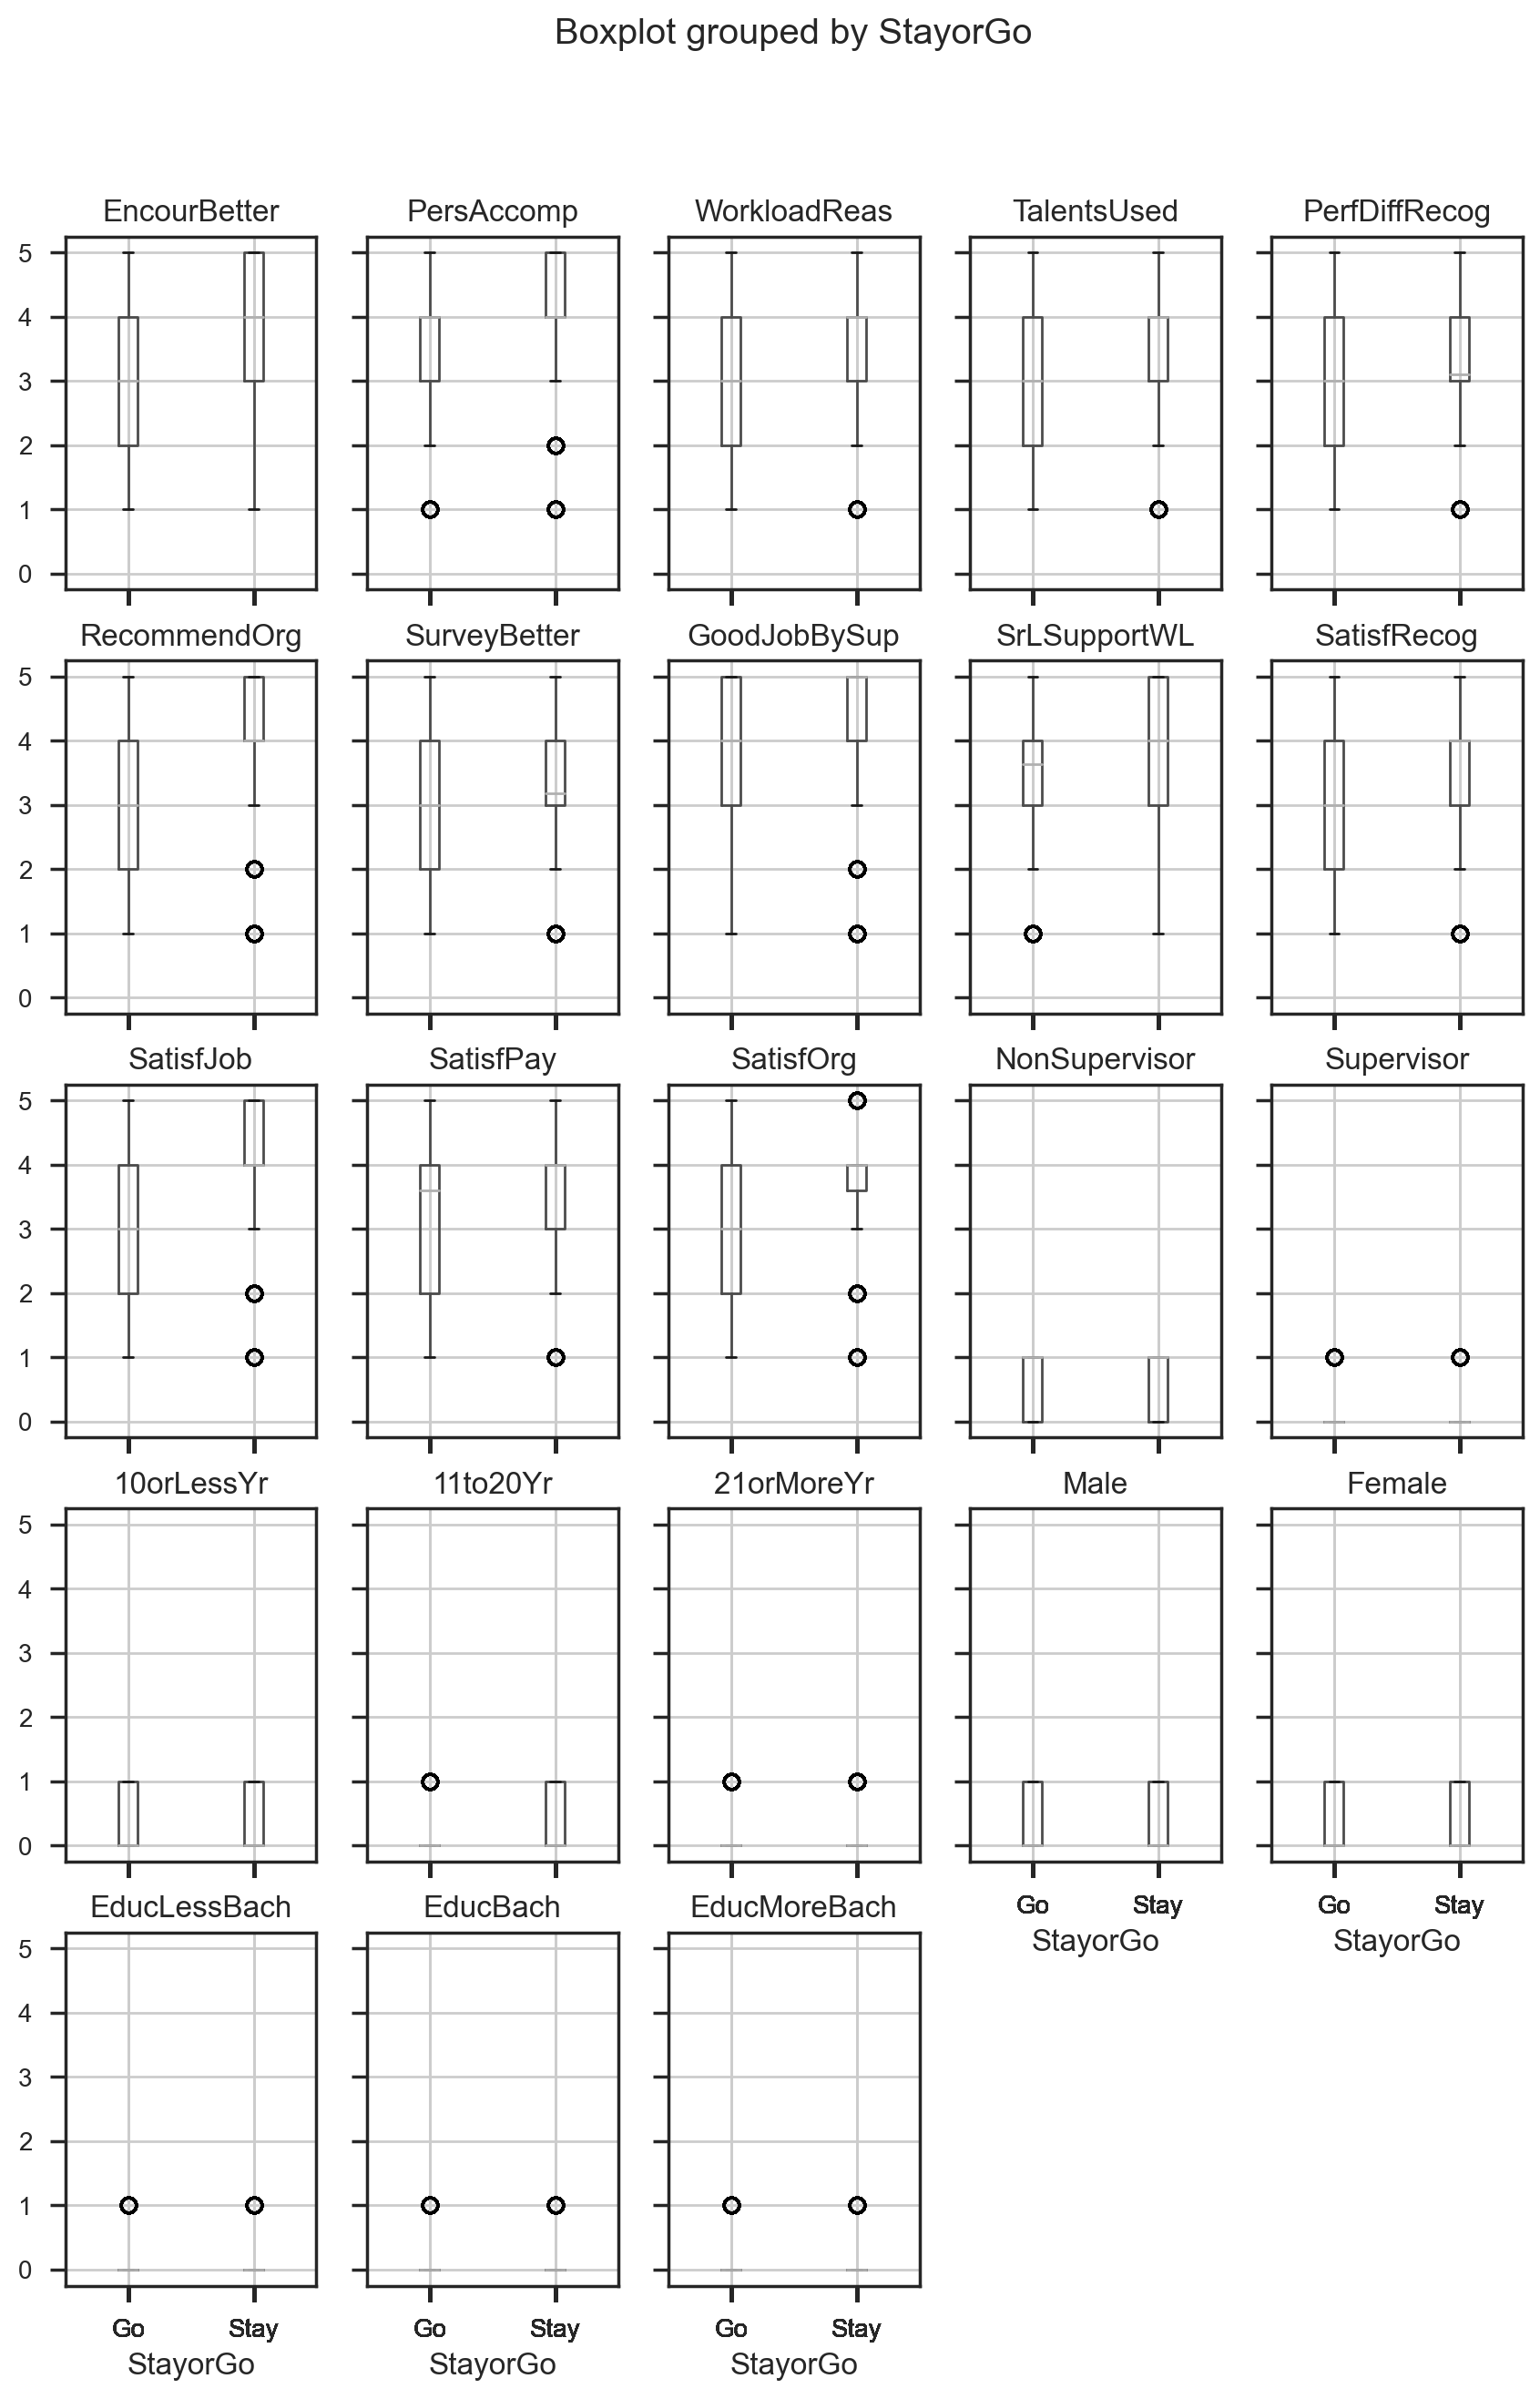

In [33]:
boxplot = X.boxplot(column=['EncourBetter', 'PersAccomp', 'WorkloadReas', 'TalentsUsed',
       'PerfDiffRecog', 'RecommendOrg', 'SurveyBetter', 'GoodJobBySup',
       'SrLSupportWL', 'SatisfRecog', 'SatisfJob', 'SatisfPay', 'SatisfOrg',
        'NonSupervisor', 'Supervisor', '10orLessYr', '11to20Yr',
       '21orMoreYr', 'Male', 'Female', 'EducLessBach', 'EducBach',
       'EducMoreBach'],
                        by= 'StayorGo',
                        fontsize=10,layout=(5,5),figsize=(10,15))  

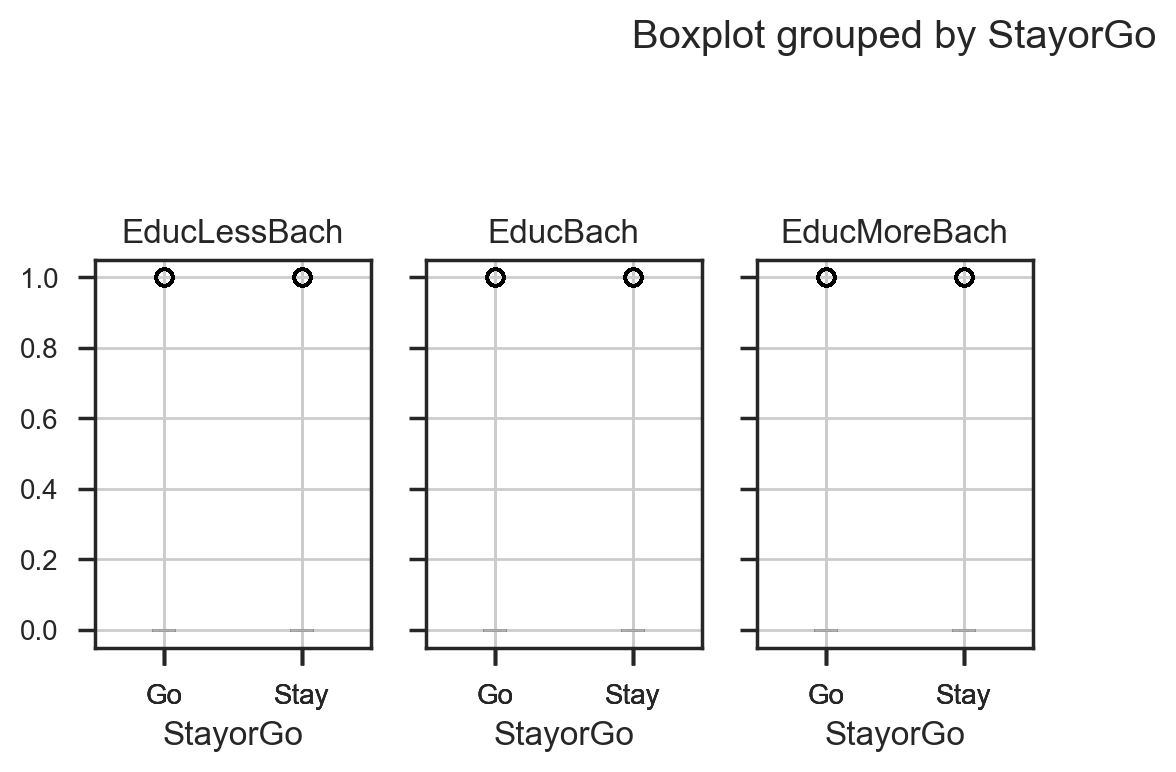

In [34]:
boxplot = X.boxplot(column=[ 'EducLessBach', 'EducBach',
       'EducMoreBach'],
                        by= 'StayorGo',
                        fontsize=10,layout=(5,5),figsize=(10,15))  

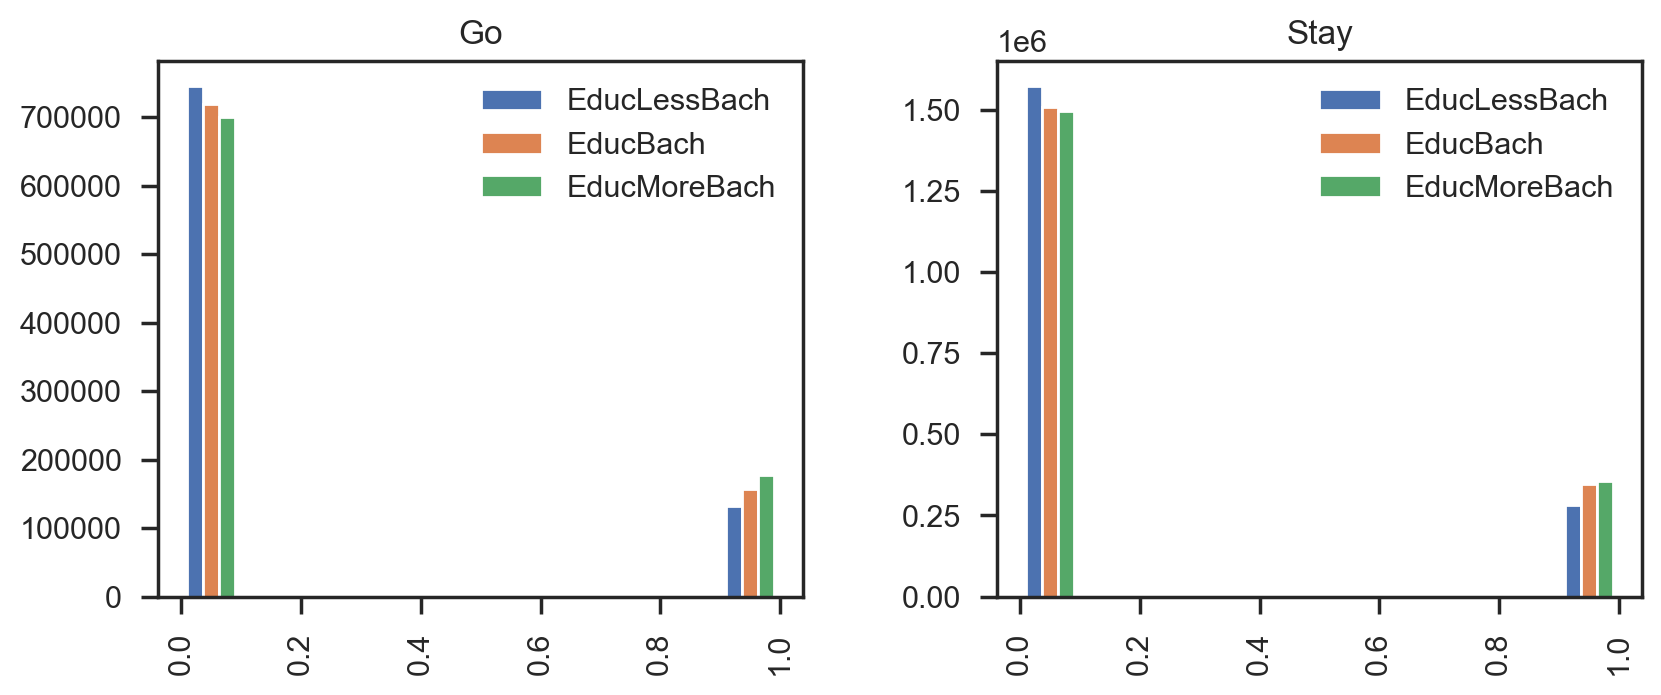

In [43]:
boxplot = X.hist(column=[ 'EducLessBach', 'EducBach',
       'EducMoreBach'],
                        by= 'StayorGo',
                       layout=(5,5),figsize=(25,25),legend=True)  

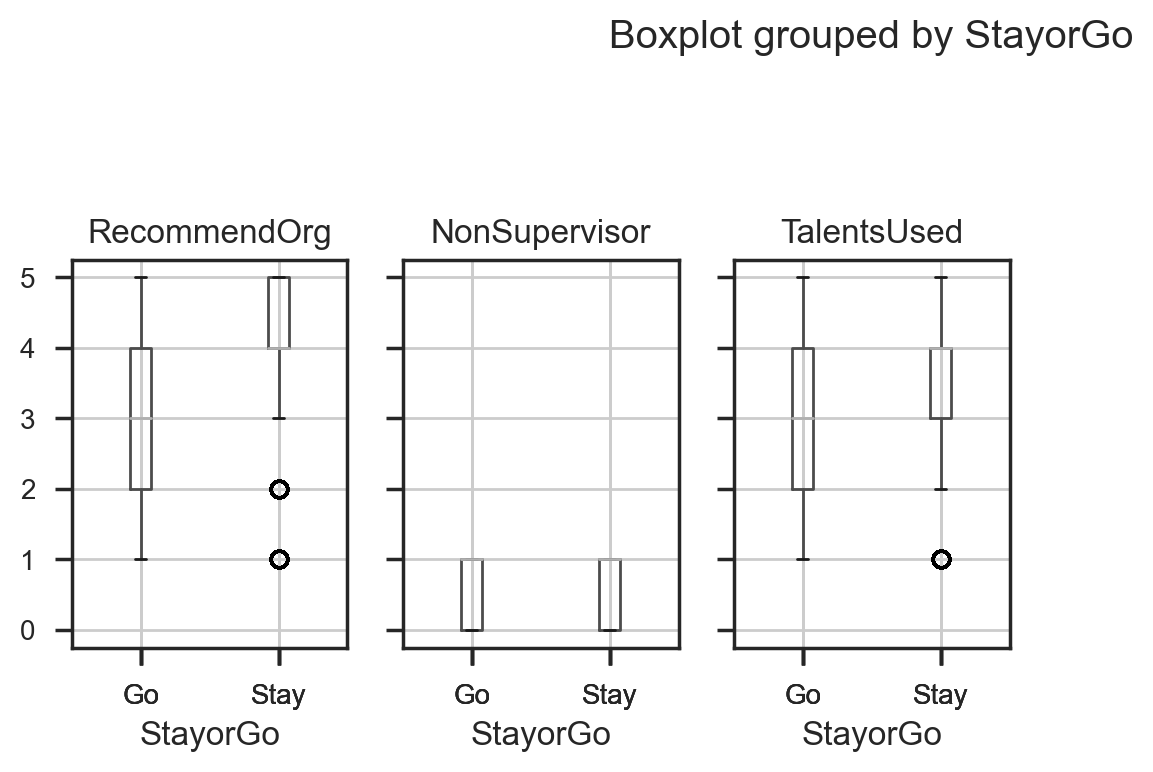

In [45]:
boxplot = X.boxplot(column=['RecommendOrg', 'NonSupervisor',
       'TalentsUsed'],
                        by= 'StayorGo',
                        fontsize=10,layout=(5,5),figsize=(10,15),meanline=True)  

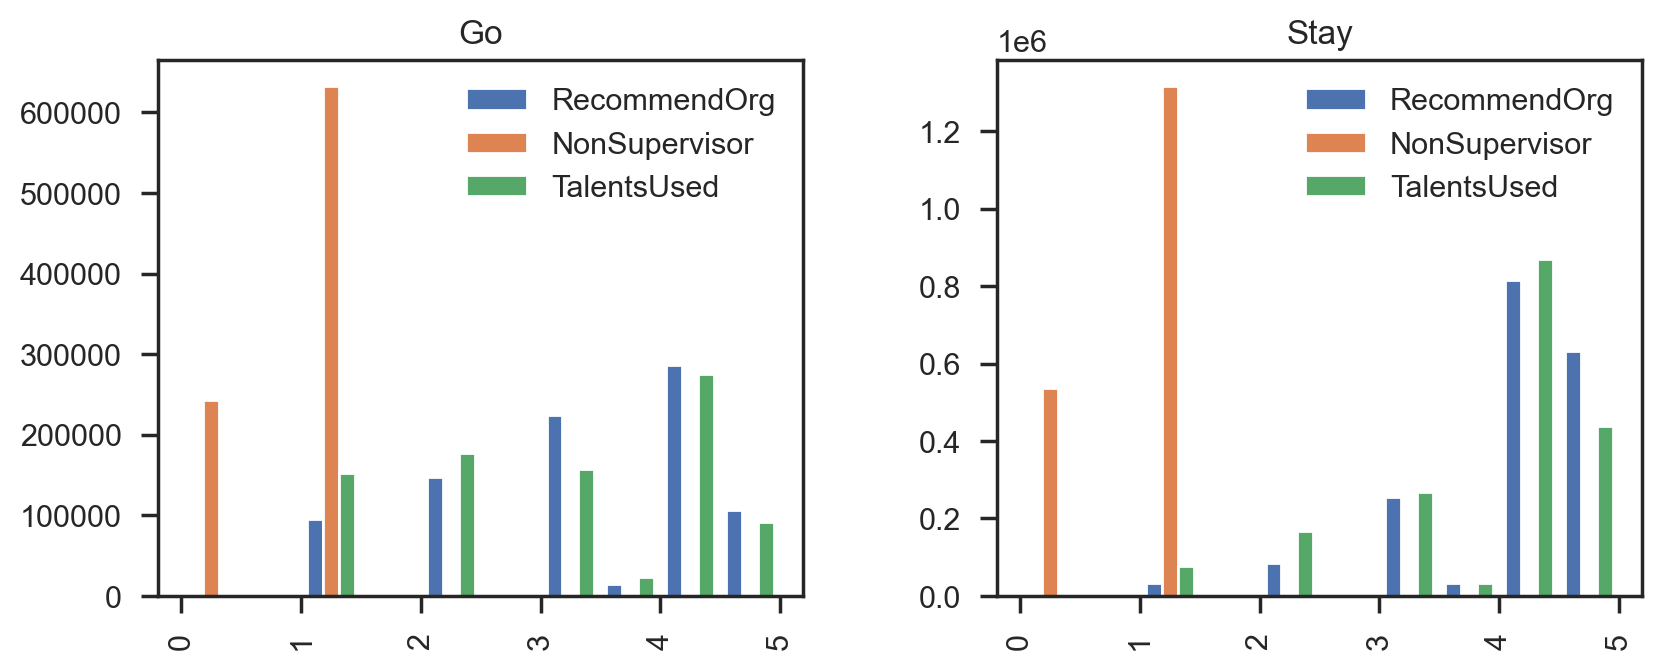

In [44]:
boxplot = X.hist(column=[ 'RecommendOrg', 'NonSupervisor',
       'TalentsUsed'],
                        by= 'StayorGo',
                       layout=(5,5),figsize=(25,25),legend=True)  

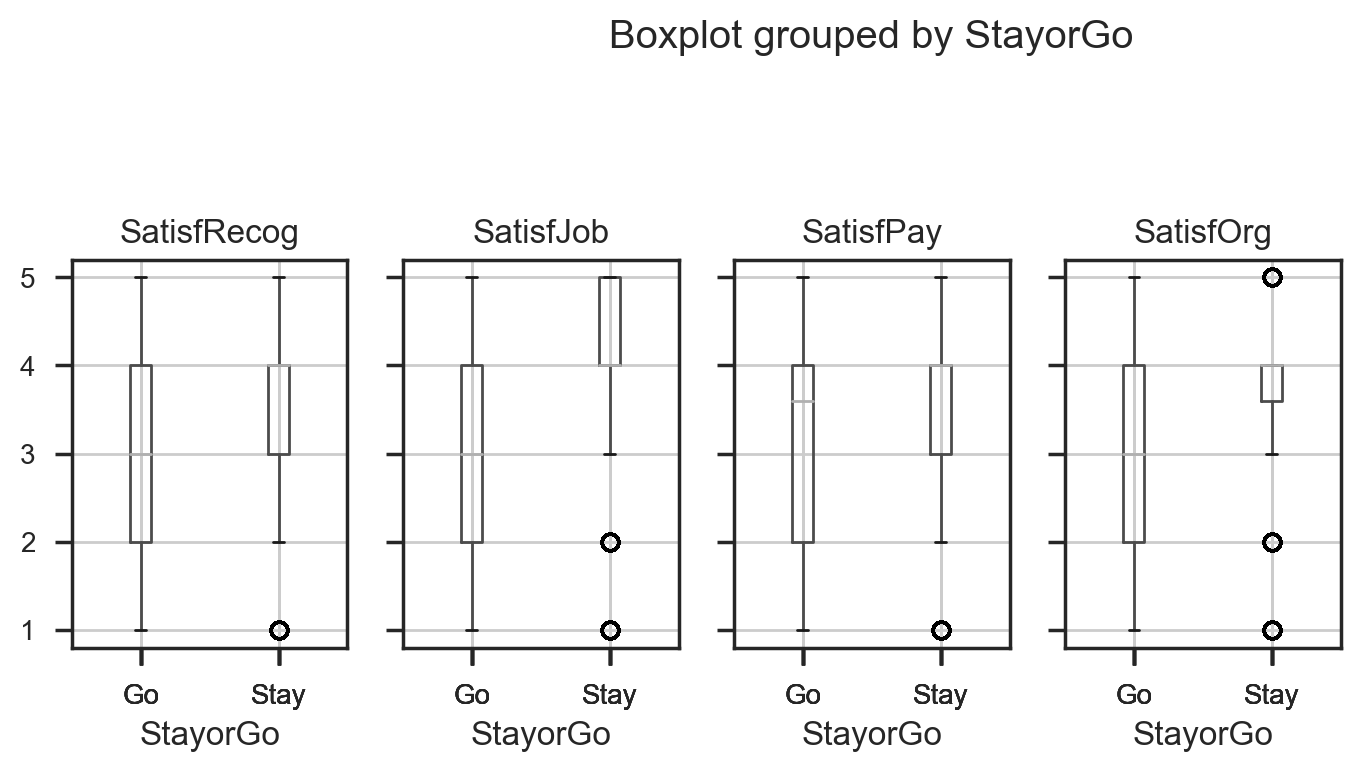

In [36]:
boxplot = X.boxplot(column=['SatisfRecog', 'SatisfJob', 'SatisfPay', 'SatisfOrg'],
                        by= 'StayorGo',
                        fontsize=10,layout=(5,5),figsize=(10,15),meanline=True)  

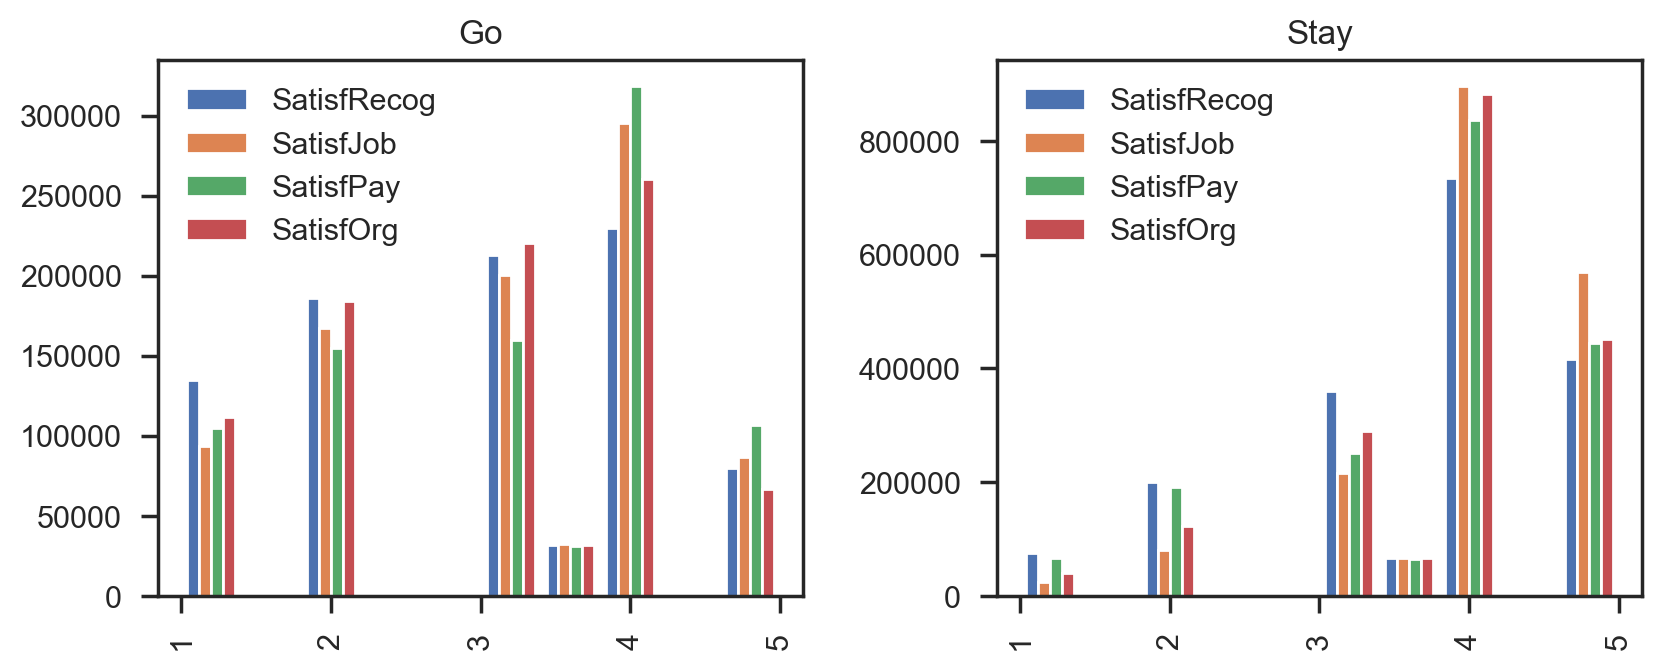

In [41]:
hisplot = X.hist(column=['SatisfRecog', 'SatisfJob', 'SatisfPay', 'SatisfOrg'],
                        by= 'StayorGo',
                       layout=(5,5),figsize=(25,25),legend=True)  